<h1 style="font-size:3rem;color:orange;">Feature Extraction</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import chirp, stft, spectrogram, hilbert
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.collections import PolyCollection
import pywt as pw
import librosa
from scipy.fftpack import dct
import os
import pandas as pd

## Fourier Transform 

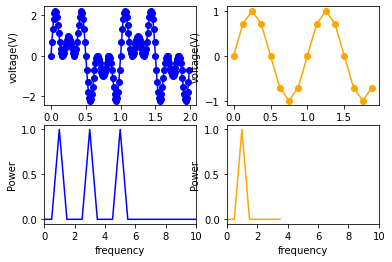

In [2]:
Fs1 = 80 #Sampling Frequency way over the minumun necesary
Fs2 = 8 # Below the Sampling Frequency necesary according to the Nyquist Theorem.  
f = [1,3,5] #Frequencies in the signal
Amplitudes=[1,1,1] #Signal Amplitudes (Change them!!) 
t1=np.arange(0,2,1/Fs1) #Samples array (# of datapoints in two seconds)
t2=np.arange(0,2,1/Fs2)
y1=np.zeros(len(t1))
y2=np.zeros(len(t2))
for freq,Amp in zip(f,Amplitudes):
    x1=Amp*np.sin(2 * np.pi * freq * t1)
    x2=Amp*np.sin(2 * np.pi * freq * t2)
    y1 = y1+x1
    y2 = y2+x2
fig, axs = plt.subplots(2,2)
axs[0,0].plot(t1, y1,'o-',color='b')
axs[0,0].set_xlabel('sample(n)')
axs[0,0].set_ylabel('voltage(V)')
axs[0,1].plot(t2, y2,'o-',color='orange')
axs[0,1].set_xlabel('time(n)')
axs[0,1].set_ylabel('voltage(V)')

Period=1/Fs1
N=len(t1) #Number of data points
y1f = fft(y1)
x1f = fftfreq(N, Period)[:N//2]
axs[1,0].plot(x1f, 2.0/N * np.abs(y1f[0:N//2]),color='b')
axs[1,0].set_xlabel('frequency')
axs[1,0].set_ylabel('Power')
axs[1,0].set_xlim(0,10)
Period=1/Fs2
N=len(t2) #Number of data points
y2f = fft(y2)
x2f = fftfreq(N, Period)[:N//2]
axs[1,1].plot(x2f, 2.0/N * np.abs(y2f[0:N//2]),color='orange')
axs[1,1].set_xlabel('frequency')
axs[1,1].set_ylabel('Power')
axs[1,1].set_xlim(0,10)
plt.show()

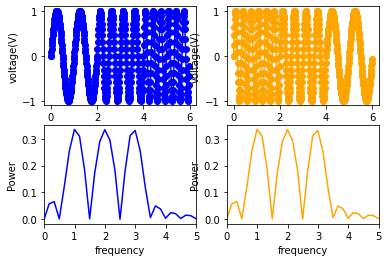

In [46]:
Fs = 80 #Sampling Frequency way over the minumun necesary
f1 = [1,2,3] #Frequencies in the signal
f2 = [3,2,1] #Frequencies in the signal
Amplitudes=[1,1,1] #Signal Amplitudes (Change them!!) 
t=np.arange(0,2,1/Fs) #Samples array (# of datapoints in two seconds)
y1=0
y2=0
T=0
cont=0
for freq1, freq2,Amp in zip(f1,f2,Amplitudes):
    x1 = Amp*np.sin(2 * np.pi * freq1 * t)
    x2 = Amp*np.sin(2 * np.pi * freq2 * t)
    y1 = np.hstack((y1,x1))
    y2 = np.hstack((y2,x2))
    T = np.hstack((T,t+cont))
    cont+=2
fig, axs = plt.subplots(2,2)
axs[0,0].plot(T, y1,'o-',color='b')
axs[0,0].set_xlabel('sample(n)')
axs[0,0].set_ylabel('voltage(V)')
axs[0,1].plot(T, y2,'o-',color='orange')
axs[0,1].set_xlabel('sample(n)')
axs[0,1].set_ylabel('voltage(V)')

Period=1/Fs
N=len(T) #Number of data points
y1f = fft(y1)
x1f = fftfreq(N, Period)[:N//2]
axs[1,0].plot(x1f, 2.0/N * np.abs(y1f[0:N//2]),color='b')
axs[1,0].set_xlabel('frequency')
axs[1,0].set_ylabel('Power')
axs[1,0].set_xlim(0,5)

y2f = fft(y2)
x2f = fftfreq(N, Period)[:N//2]
axs[1,1].plot(x2f, 2.0/N * np.abs(y2f[0:N//2]),color='orange')
axs[1,1].set_xlabel('frequency')
axs[1,1].set_ylabel('Power')
axs[1,1].set_xlim(0,5)
plt.show()

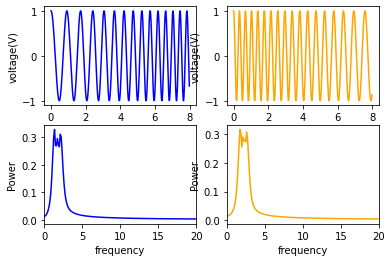

In [148]:
Fs = 80 #Sampling Frequency way over the minumun necesary
f = [1,3] #Frequencies in the signal
t=np.arange(0,8,1/Fs) #Samples array (# of datapoints in two seconds)
y1 = chirp(t, f0=f[0], f1=f[-1], t1=10, method='linear')
y2 = chirp(t, f0=f[-1], f1=f[0], t1=10, method='linear')
fig, axs = plt.subplots(2,2)
axs[0,0].plot(t, y1,'-',color='b')
axs[0,0].set_xlabel('sample(n)')
axs[0,0].set_ylabel('voltage(V)')
axs[0,1].plot(t, y2,'-',color='orange')
axs[0,1].set_xlabel('sample(n)')
axs[0,1].set_ylabel('voltage(V)')

Period=1/Fs
N=len(t) #Number of data points
y1f = fft(y1)
x1f = fftfreq(N, Period)[:N//2]
axs[1,0].plot(x1f, 2.0/N * np.abs(y1f[0:N//2]),color='b')
axs[1,0].set_xlabel('frequency')
axs[1,0].set_ylabel('Power')
axs[1,0].set_xlim(0,20)

y2f = fft(y2)
x2f = fftfreq(N, Period)[:N//2]
axs[1,1].plot(x2f, 2.0/N * np.abs(y2f[0:N//2]),color='orange')
axs[1,1].set_xlabel('frequency')
axs[1,1].set_ylabel('Power')
axs[1,1].set_xlim(0,20)
plt.show()

32767 32767 32767 32767


(0.0, 250.0)

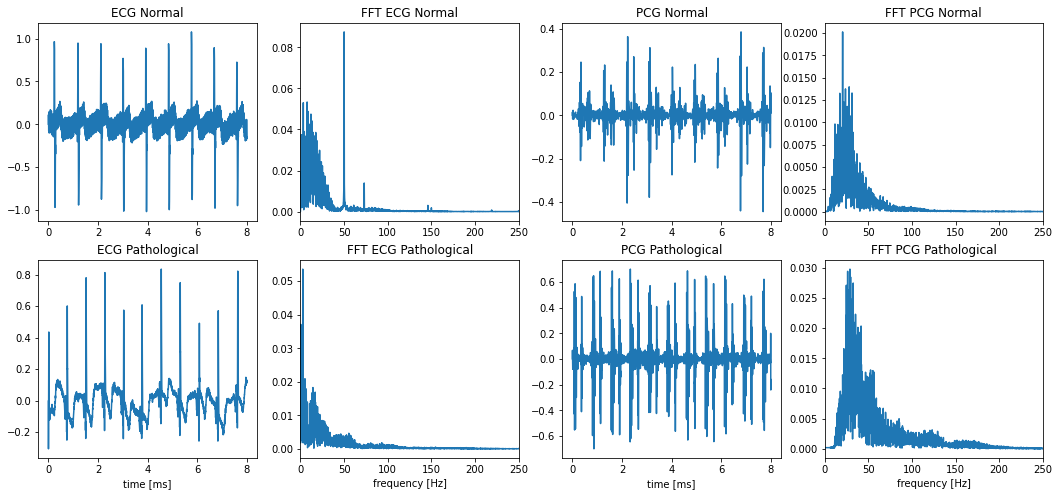

In [2]:
path ='./Signals'
Dir=np.sort(os.listdir(path))[3:]
Fs=4096

first = np.array([file[0] for file in Dir])
last = np.array([file[-5] for file in Dir])
NormalECG=Dir[(first=='n') & (last=='E')]
PatologicalECG=Dir[(first=='r') & (last=='E')]
NormalPCG=Dir[(first=='n') & (last=='P')]
PatologicalPCG=Dir[(first=='r') & (last=='P')]

fig, axs = plt.subplots(2,4, figsize=(18,8))
NECG= pd.read_csv(path+'/'+NormalECG[0])
NECG=np.array(NECG).reshape(NECG.shape[0],)
NPCG= pd.read_csv(path+'/'+NormalPCG[0])
NPCG=np.array(NPCG).reshape(NECG.shape[0],)
PECG= pd.read_csv(path+'/'+PatologicalECG[0])
PECG=np.array(PECG).reshape(NECG.shape[0],)
PPCG= pd.read_csv(path+'/'+PatologicalPCG[0])
PPCG=np.array(PPCG).reshape(NECG.shape[0],)
t=np.arange(0,len(NECG)/Fs,1/Fs)
print(len(NECG),len(NPCG),len(PECG),len(PPCG))
axs[0,0].plot(t,NECG)
axs[0,0].set_title('ECG Normal')
axs[1,0].plot(t,PECG)
axs[1,0].set_title('ECG Pathological')
axs[1,0].set_xlabel('time [ms]')
axs[0,2].plot(t,NPCG)
axs[0,2].set_title('PCG Normal')
axs[1,2].plot(t,PPCG)
axs[1,2].set_title('PCG Pathological')
axs[1,2].set_xlabel('time [ms]')


Period=1/Fs
N=len(t) #Number of data points
x1f = fftfreq(N, Period)[:N//2]
y1f = fft(NECG)
axs[0,1].plot(x1f, 2.0/N * np.abs(y1f[0:N//2]))
axs[0,1].set_title('FFT ECG Normal')
axs[0,1].set_xlim(0,250)
y1f = fft(PECG)
axs[1,1].plot(x1f, 2.0/N * np.abs(y1f[0:N//2]))
axs[1,1].set_title('FFT ECG Pathological')
axs[1,1].set_xlabel('frequency [Hz]')
axs[1,1].set_xlim(0,250)
y1f = fft(NPCG)
axs[0,3].plot(x1f, 2.0/N * np.abs(y1f[0:N//2]))
axs[0,3].set_title('FFT PCG Normal')
axs[0,3].set_xlim(0,250)
y1f = fft(PPCG)
axs[1,3].plot(x1f, 2.0/N * np.abs(y1f[0:N//2]))
axs[1,3].set_title('FFT PCG Pathological')
axs[1,3].set_xlabel('frequency [Hz]')
axs[1,3].set_xlim(0,250)




## STFT

(0.0, 50.0)

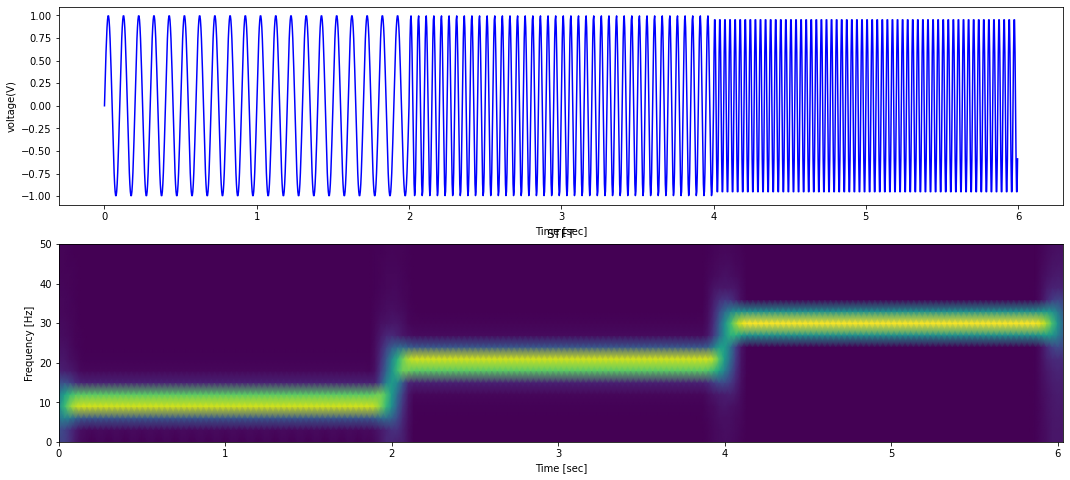

In [35]:
Fs = 300 #Sampling Frequency way over the minumun necesary
f1 = [10,20,30] #Frequencies in the signal
Amplitudes=[1,1,1] #Signal Amplitudes (Change them!!) 
t=np.arange(0,2,1/Fs) #Samples array (# of datapoints in two seconds)
y=0
T=0
cont=0
for freq1,Amp in zip(f1,Amplitudes):
    x = Amp*np.sin(2 * np.pi * freq1 * t)
    y = np.hstack((y,x))
    T = np.hstack((T,t+cont))
    cont+=2
fig, axs = plt.subplots(2,figsize=(18,8))
axs[0].plot(T, y,'-',color='b')
axs[0].set_xlabel('Time [sec]')
axs[0].set_ylabel('voltage(V)')

nperseg=100
f, t, Zxx = stft(y, Fs, nperseg=nperseg, noverlap=round(nperseg*.9))
axs[1].pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=.5, shading='gouraud')
axs[1].set_title('STFT')
axs[1].set_ylabel('Frequency [Hz]')
axs[1].set_xlabel('Time [sec]')
axs[1].set_ylim(0,50)


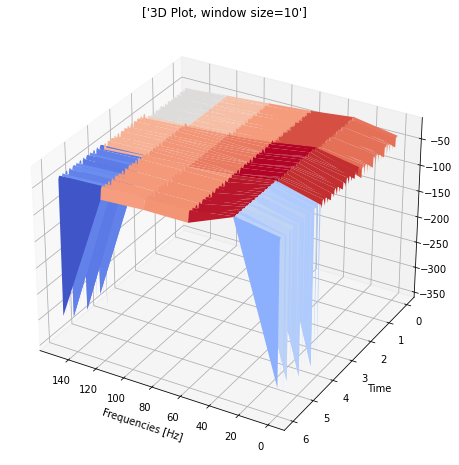

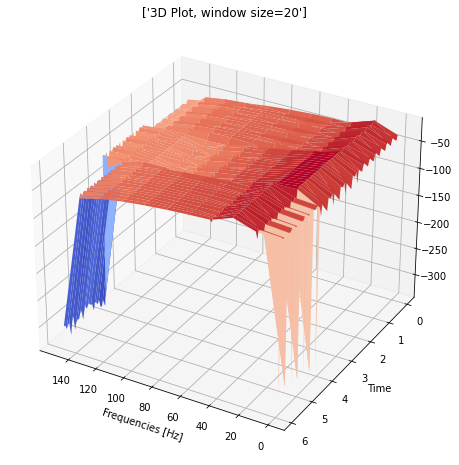

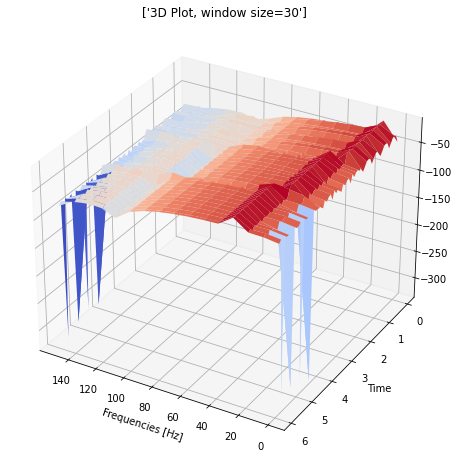

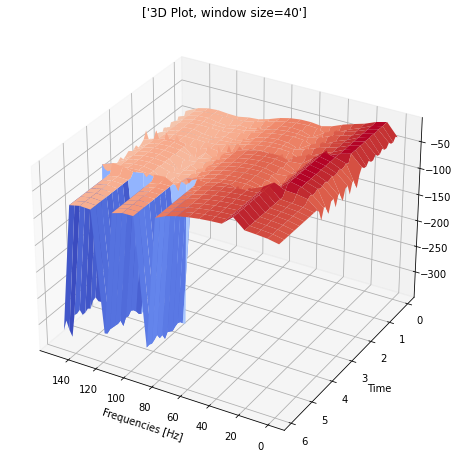

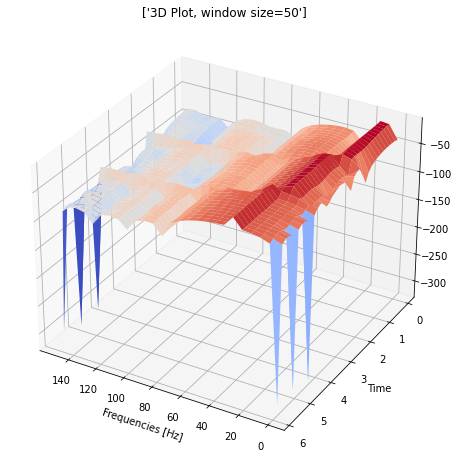

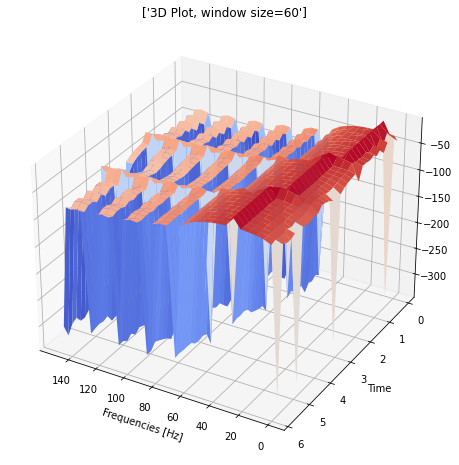

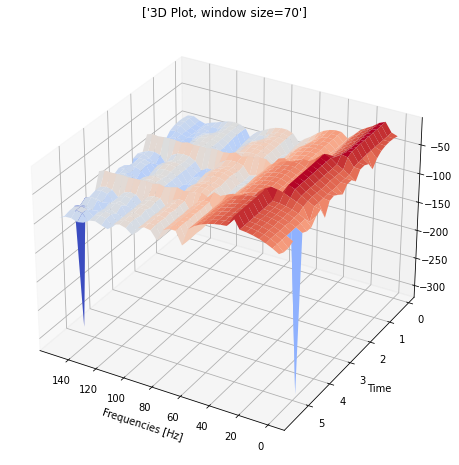

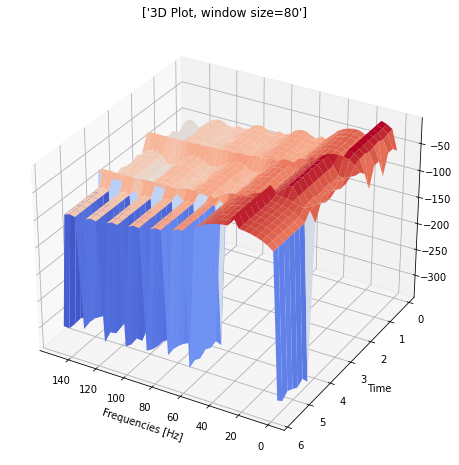

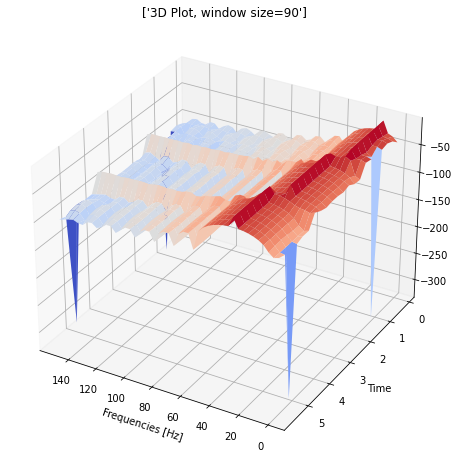

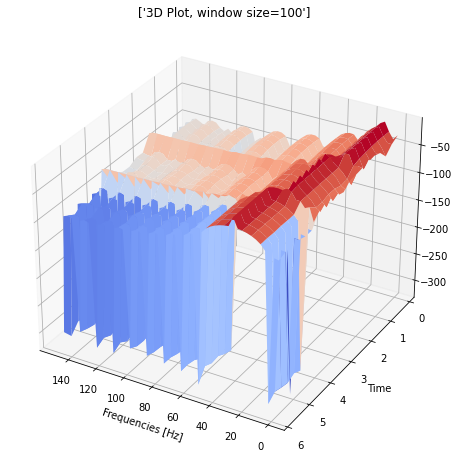

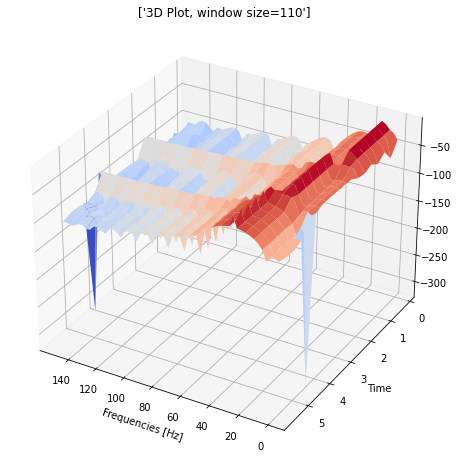

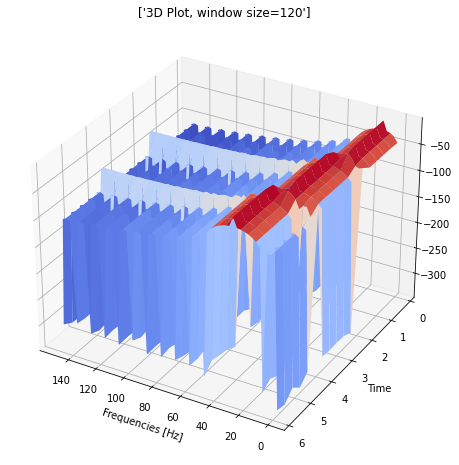

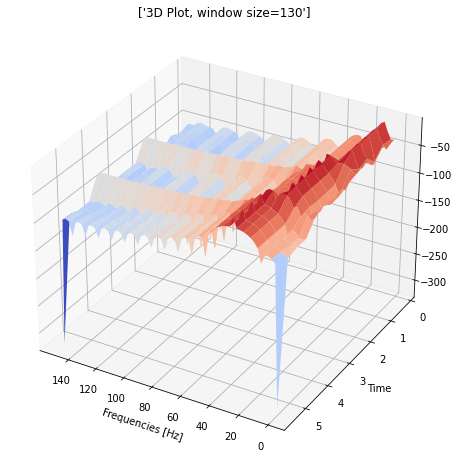

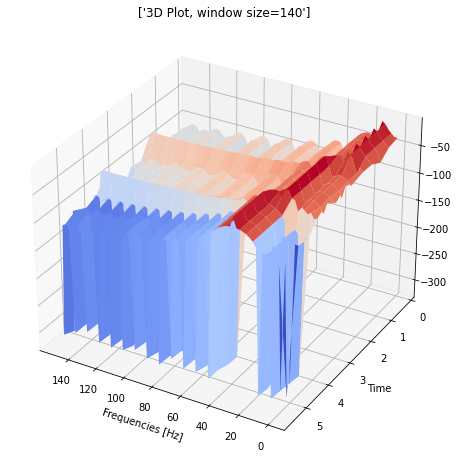

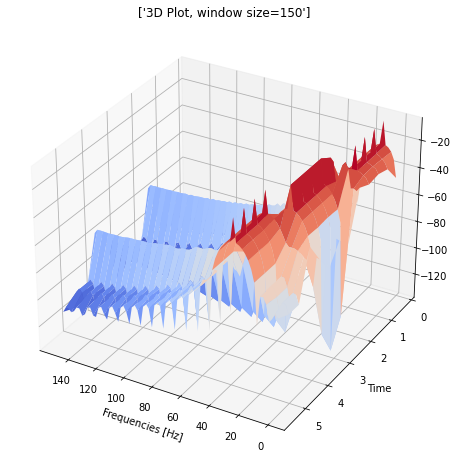

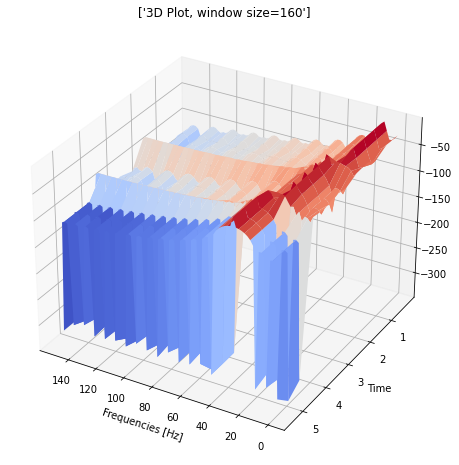

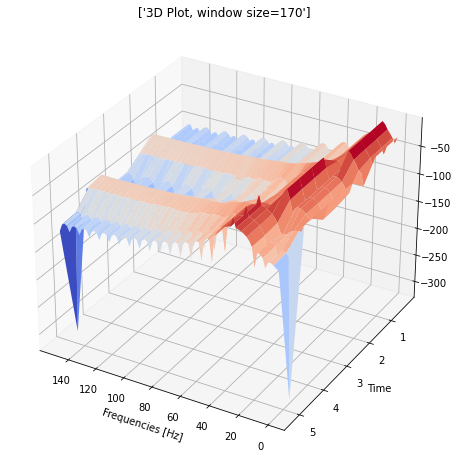

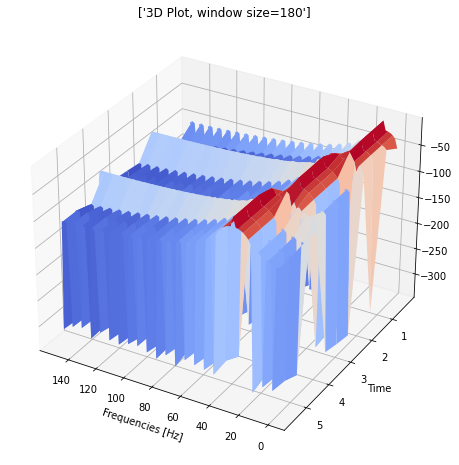

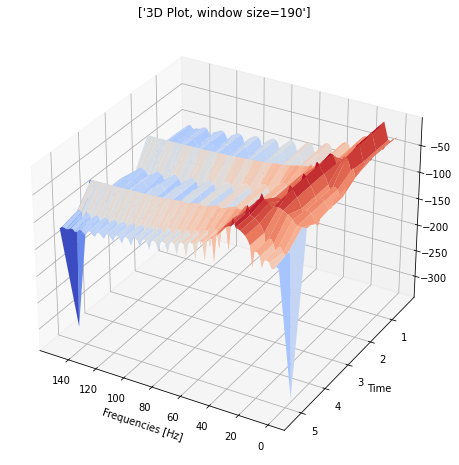

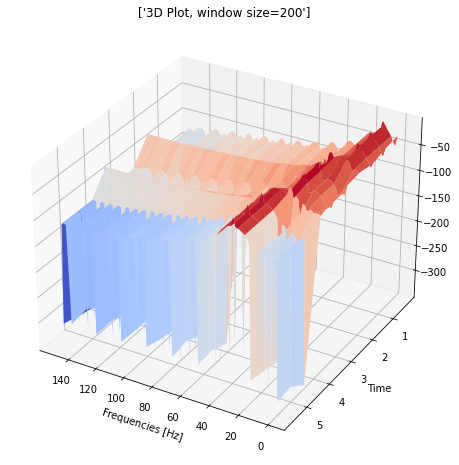

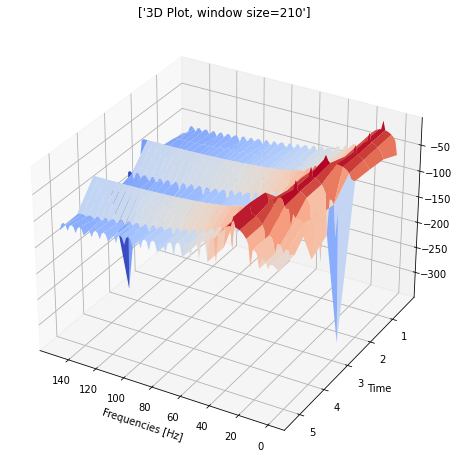

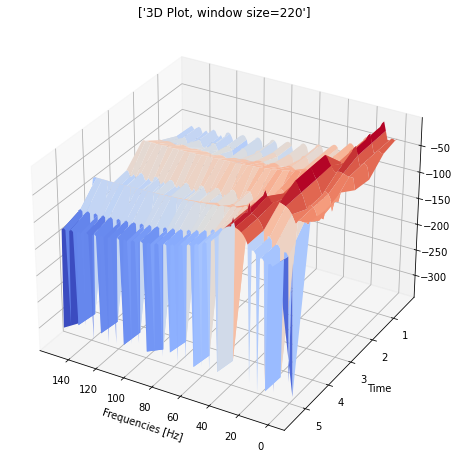

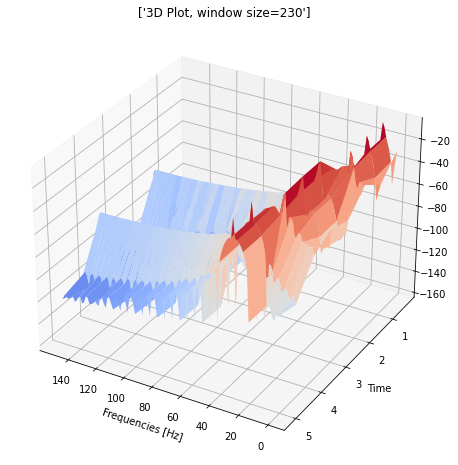

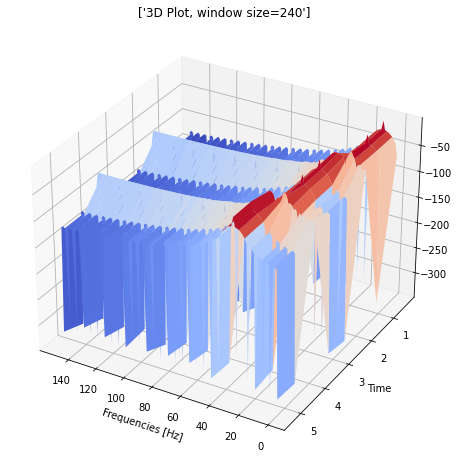

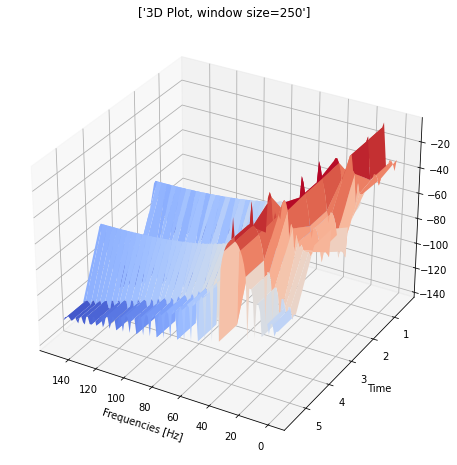

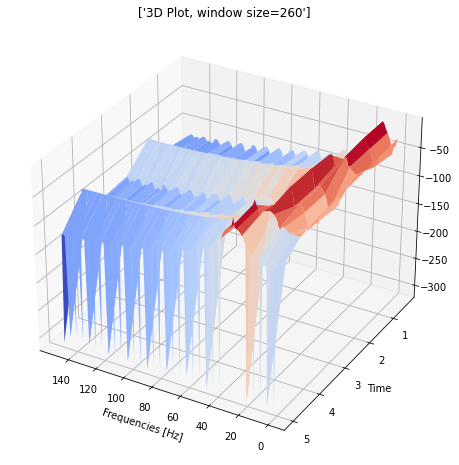

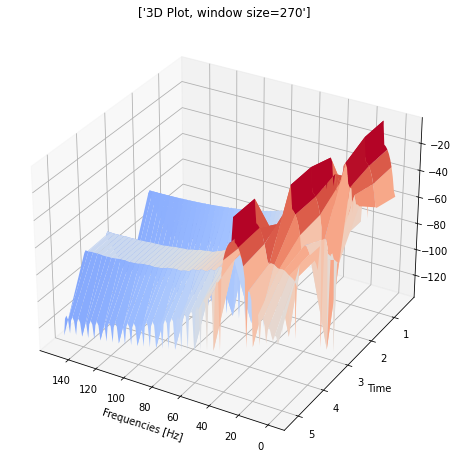

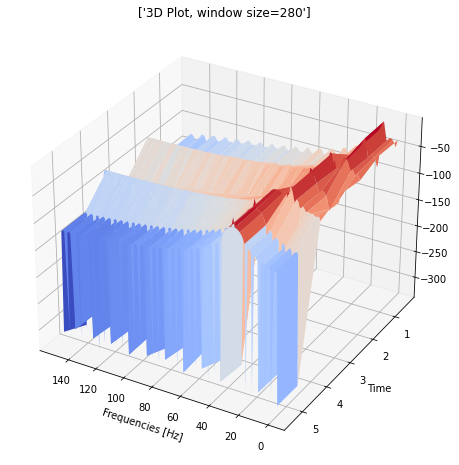

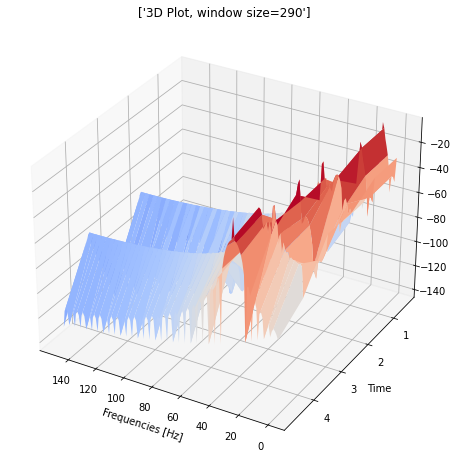

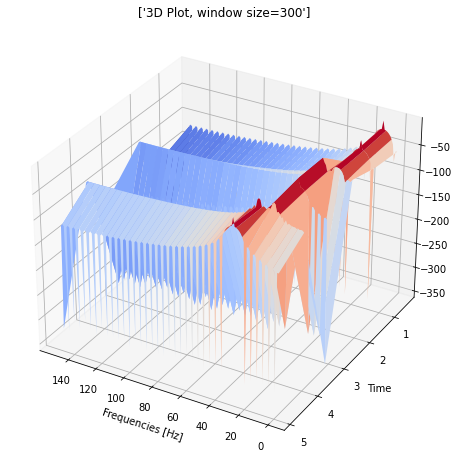

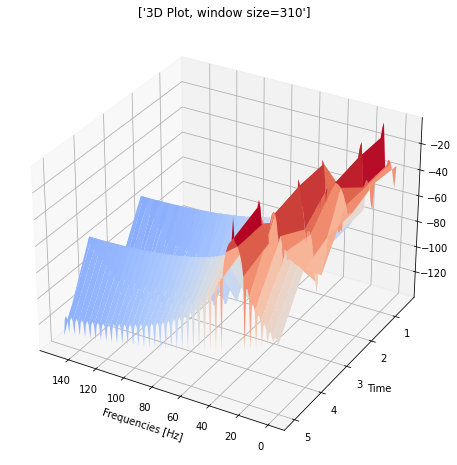

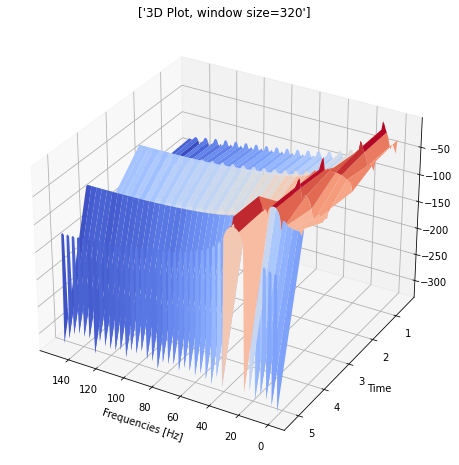

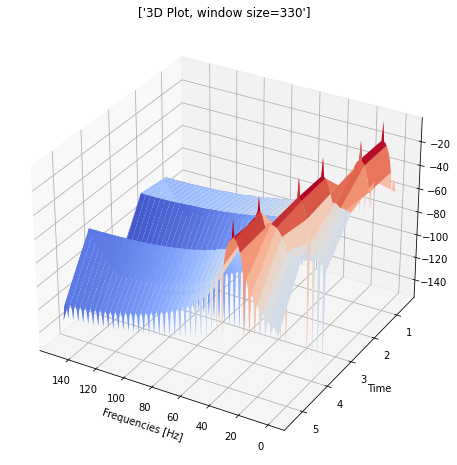

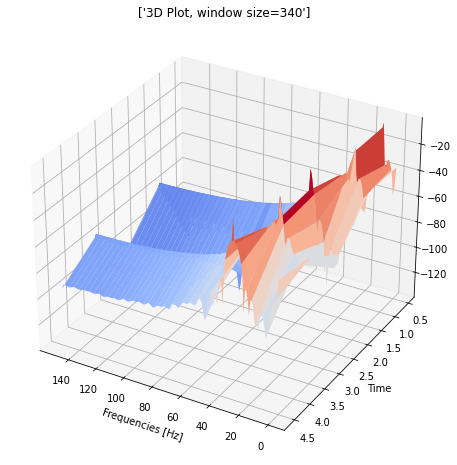

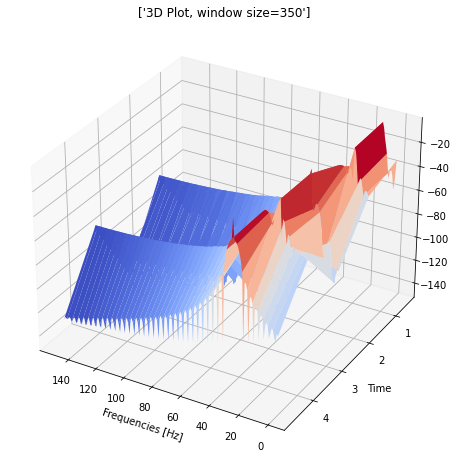

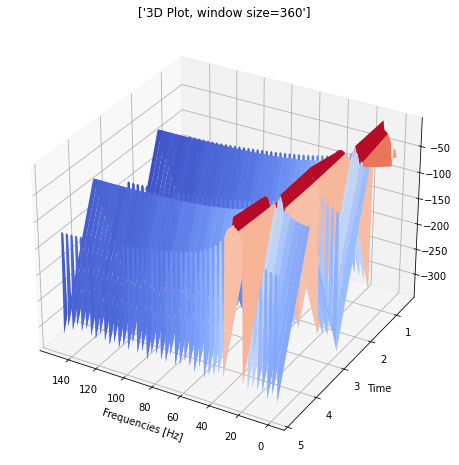

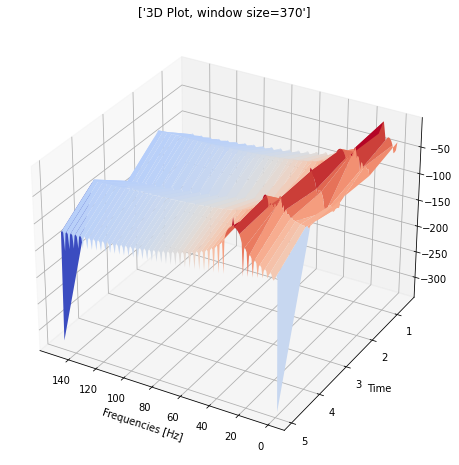

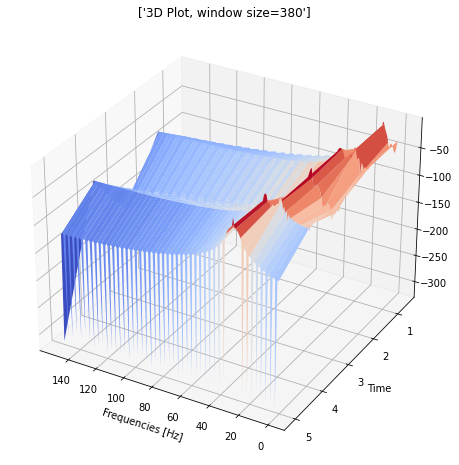

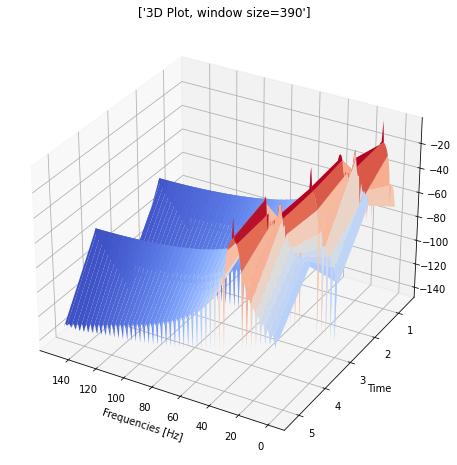

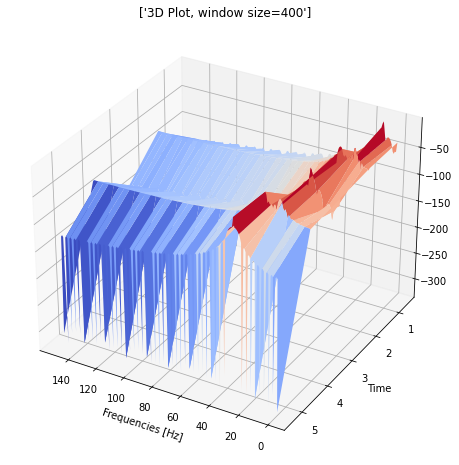

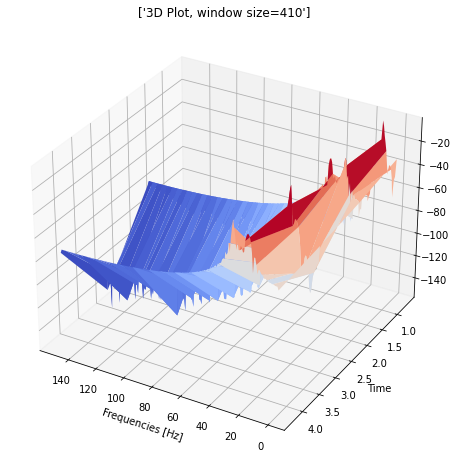

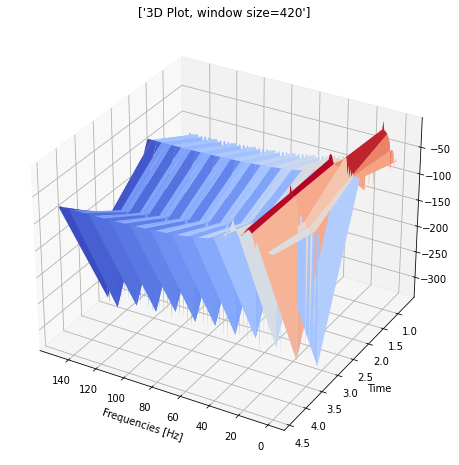

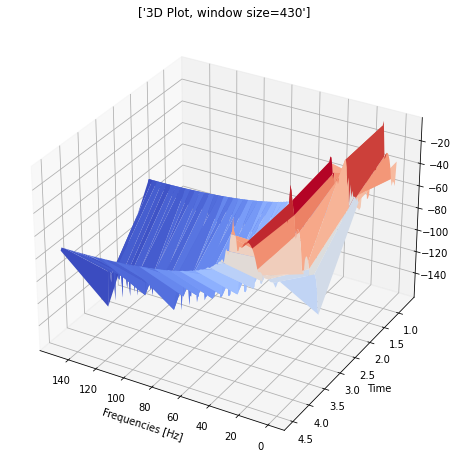

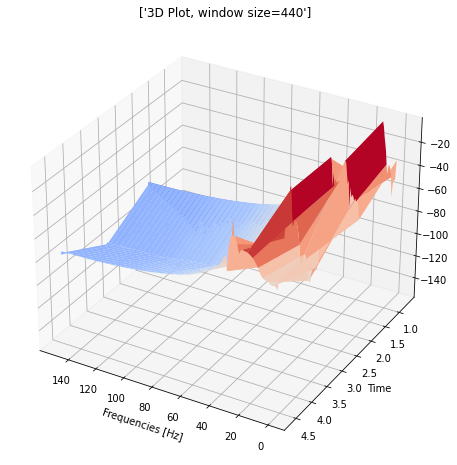

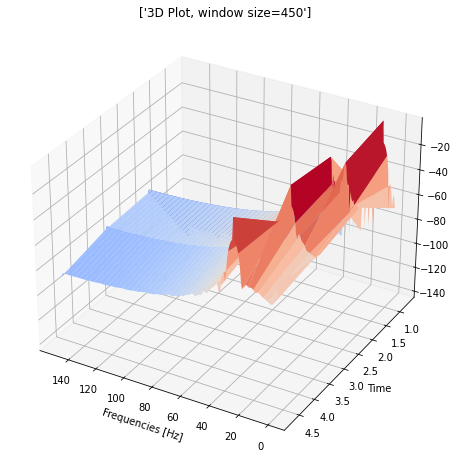

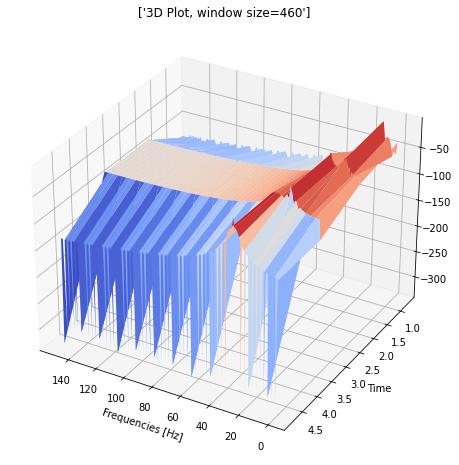

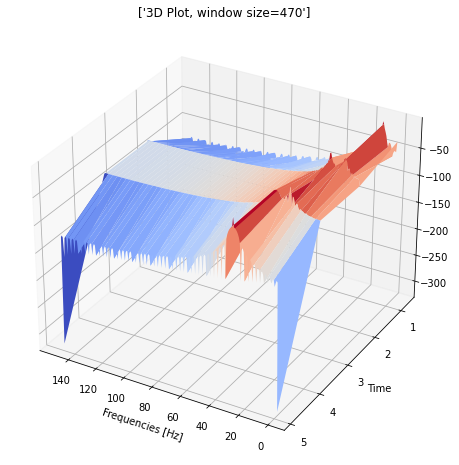

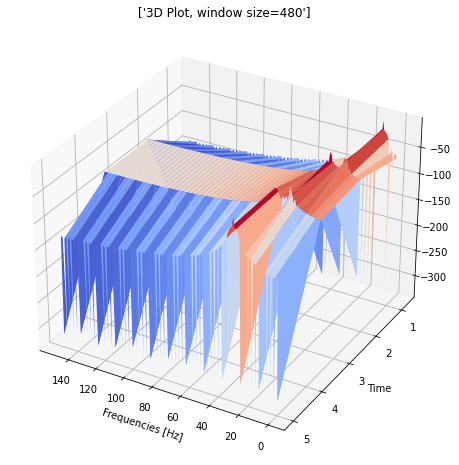

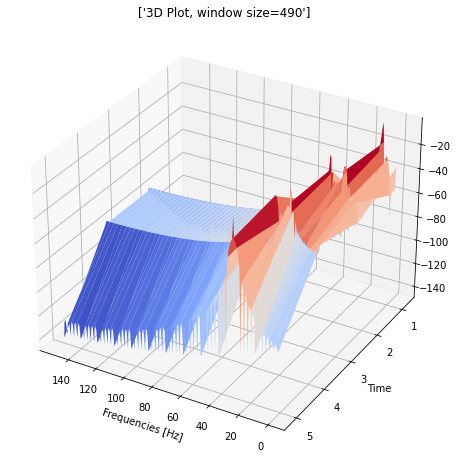

In [11]:

for n in np.arange(10,500,10):
    plt.figure(figsize=(18,8))
    ax = plt.axes(projection='3d')
    ax.set_title(['3D Plot, window size=' +str(n)], loc='center', wrap=True)
    f, t, Sxx = spectrogram(y, Fs, nperseg=n)
    ax.plot_surface(f[:, None], t[None, :], 10.0*np.log10(np.abs(Sxx)), cmap=cm.coolwarm)
    ax.set_xlabel('Frequencies [Hz]')
    ax.set_ylabel('Time')
    ax.view_init(30, 120)
    plt.draw()
    plt.show()
    plt.pause(0.05)

Text(0.5, 0, 'Time [sec]')

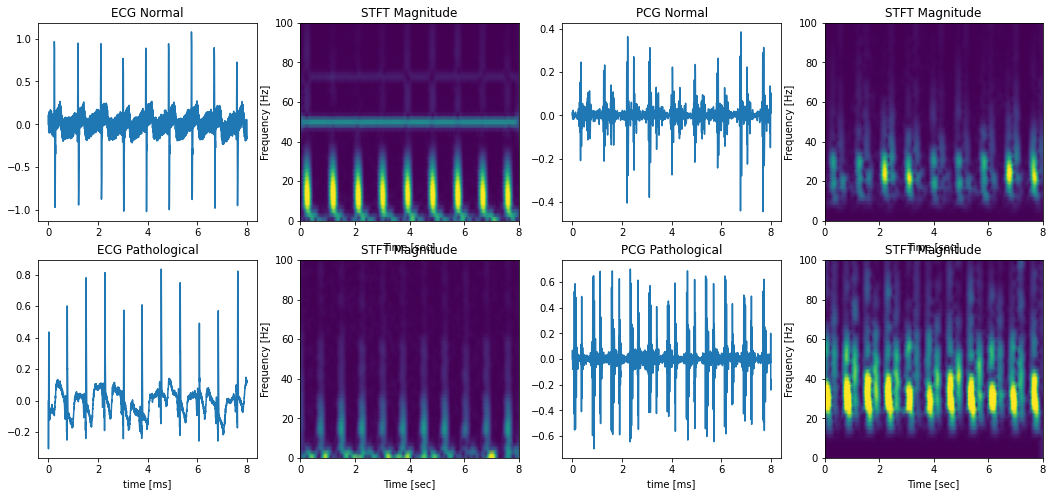

In [17]:
Fs=4096
t=np.arange(0,len(NECG)/Fs,1/Fs)
fig, axs = plt.subplots(2,4, figsize=(18,8))
#print(len(NECG),len(NPCG),len(PECG),len(PPCG))
axs[0,0].plot(t,NECG)
axs[0,0].set_title('ECG Normal')
axs[1,0].plot(t,PECG)
axs[1,0].set_title('ECG Pathological')
axs[1,0].set_xlabel('time [ms]')
axs[0,2].plot(t,NPCG)
axs[0,2].set_title('PCG Normal')
axs[1,2].plot(t,PPCG)
axs[1,2].set_title('PCG Pathological')
axs[1,2].set_xlabel('time [ms]')

nperseg=2000
f, t, Zxx = stft(NECG, Fs, nperseg=nperseg, noverlap=round(nperseg*.95))
axs[0,1].pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=.1, shading='gouraud')
axs[0,1].set_ylim(0,100)
axs[0,1].set_title('STFT Magnitude')
axs[0,1].set_ylabel('Frequency [Hz]')
axs[0,1].set_xlabel('Time [sec]')

f, t, Zxx = stft(PECG, Fs, nperseg=nperseg, noverlap=round(nperseg*.95))
axs[1,1].pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=.1, shading='gouraud')
axs[1,1].set_ylim(0,100)
axs[1,1].set_title('STFT Magnitude')
axs[1,1].set_ylabel('Frequency [Hz]')
axs[1,1].set_xlabel('Time [sec]')

f, t, Zxx = stft(NPCG, Fs, nperseg=nperseg, noverlap=round(nperseg*.95))
axs[0,3].pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=.05, shading='gouraud')
axs[0,3].set_ylim(0,100)
axs[0,3].set_title('STFT Magnitude')
axs[0,3].set_ylabel('Frequency [Hz]')
axs[0,3].set_xlabel('Time [sec]')

f, t, Zxx = stft(PPCG, Fs, nperseg=nperseg, noverlap=round(nperseg*.95))
axs[1,3].pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=.05, shading='gouraud')
axs[1,3].set_ylim(0,100)
axs[1,3].set_title('STFT Magnitude')
axs[1,3].set_ylabel('Frequency [Hz]')
axs[1,3].set_xlabel('Time [sec]')

![](Img/Windows.png)

## CWT 

[2.8853900817779268, 7.213475204444817]


Text(0.5, 0, 'time (ms)')

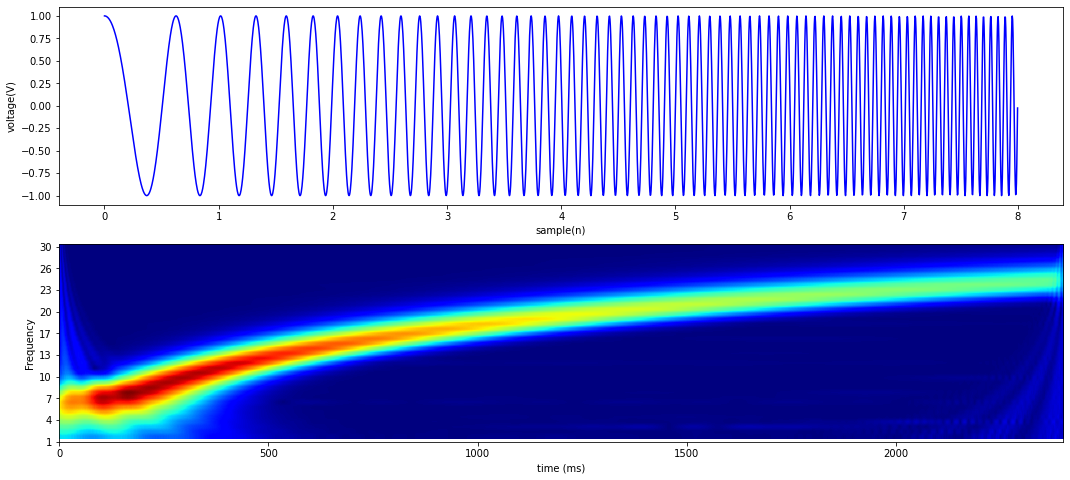

In [4]:
def freq2scale(MotherWavelet,fs,fmax,fmin):
    cf=pw.central_frequency(MotherWavelet)
    Scale=[]
    freqs=[fmax,fmin]
    for fr in freqs:
        Scale.append(np.round(np.log((cf*fs)/fr))/np.log(2))
    return Scale

fs = 300 #Sampling Frequency way over the minumun necesary
f = [1,20] #Frequencies in the signal
t=np.arange(0,8,1/fs) #Samples array (# of datapoints in two seconds)
y = chirp(t, f0=f[0], f1=f[-1], t1=10, method='linear')
fig, axs = plt.subplots(2,figsize=(18,8))
axs[0].plot(t, y,'-',color='b')
axs[0].set_xlabel('sample(n)')
axs[0].set_ylabel('voltage(V)')

motherWavelet='morl'
fmax=30
fmin=1
sc=freq2scale(motherWavelet,fs,fmax,fmin)
print(sc)
scales=[]
v=np.arange(sc[0],sc[1],1)
M=8 #voices or subscales
for J in v:   #generate the scales
        a1=[]
        for m in np.arange(1,M+1): 
            a1.append(2**(J+(m/M)))

        scales.append(a1)
scales = np.array(scales)
scales = scales.reshape(scales.shape[1]*scales.shape[0],)
sp=1/fs #sampling period
sig= hilbert(y) # Hilbert Transform
#sig=y
cwt, freqs = pw.cwt(sig, scales, motherWavelet, sampling_period=sp)
cwt=np.abs(cwt)
axs[1].imshow(cwt,aspect='auto',cmap='jet')
OriginalTicks=axs[1].get_yticks()
axs[1].set_yticks(np.linspace(0,len(freqs),len(OriginalTicks)))
axs[1].set_yticklabels(np.linspace(int(freqs[0]),int(freqs[-1]),len(OriginalTicks)).astype(int))
axs[1].set_ylabel('Frequency')
axs[1].set_xlabel('time (ms)')

![Wavelet Family List](Img/wavelet-families.png)

![Some morphologies](Img/wavelets.jpg)

[5.7707801635558535, 7.213475204444817]


Text(0.5, 0, 'time (ms)')

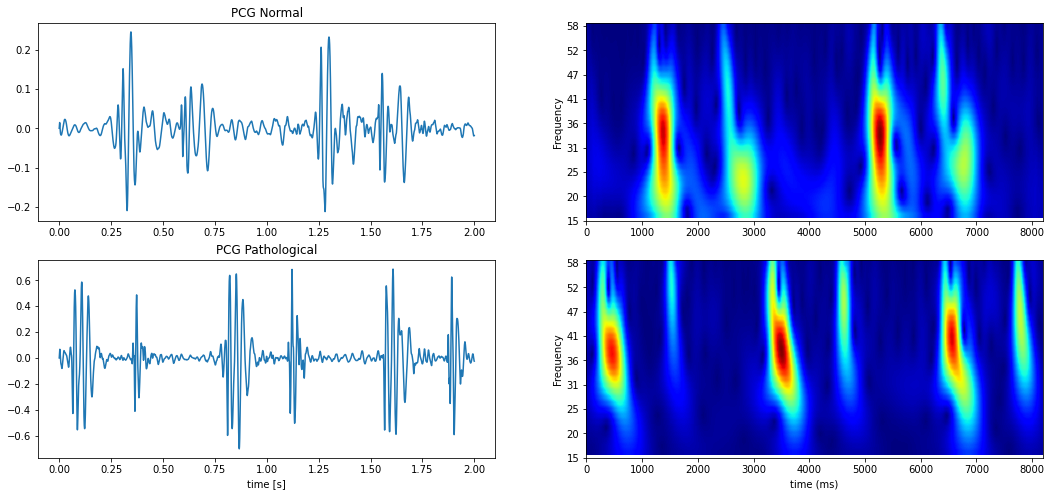

In [32]:
Fs=4096
Dp=Fs*2
t=np.arange(0,len(NECG[:Dp])/Fs,1/Fs)
fig, axs = plt.subplots(2,2, figsize=(18,8))
#print(len(NECG),len(NPCG),len(PECG),len(PPCG))
axs[0,0].plot(t,NPCG[:Dp])
axs[0,0].set_title('PCG Normal')
axs[1,0].plot(t,PPCG[:Dp])
axs[1,0].set_title('PCG Pathological')
axs[1,0].set_xlabel('time [s]')

motherWavelet='morl'
fmax=50
fmin=20
sc=freq2scale(motherWavelet,Fs,fmax,fmin)
print(sc)
scales=[]
v=np.arange(sc[0],sc[1],1)
M=16 #voices or subscales
for J in v:   #generate the scales
        a1=[]
        for m in np.arange(1,M+1): 
            a1.append(2**(J+(m/M)))

        scales.append(a1)
scales = np.array(scales)
scales = scales.reshape(scales.shape[1]*scales.shape[0],)
sp=1/Fs #sampling period

cwt, freqs = pw.cwt(hilbert(NPCG[:Dp]), scales, motherWavelet, sampling_period=sp)
#cwt, freqs = pw.cwt((NPCG[:Dp]), scales, motherWavelet, sampling_period=sp)
cwt=np.abs(cwt)
axs[0,1].imshow(cwt,aspect='auto',cmap='jet')
OriginalTicks=axs[0,1].get_yticks()
axs[0,1].set_yticks(np.linspace(0,len(freqs),len(OriginalTicks)))
axs[0,1].set_yticklabels(np.linspace(int(freqs[0]),int(freqs[-1]),len(OriginalTicks)).astype(int))
axs[0,1].set_ylabel('Frequency')


cwt, freqs = pw.cwt(hilbert(PPCG[:Dp]), scales, motherWavelet, sampling_period=sp)
#cwt, freqs = pw.cwt((PPCG[:Dp]), scales, motherWavelet, sampling_period=sp)
cwt=np.abs(cwt)
axs[1,1].imshow(cwt,aspect='auto',cmap='jet')
OriginalTicks=axs[1,1].get_yticks()
axs[1,1].set_yticks(np.linspace(0,len(freqs),len(OriginalTicks)))
axs[1,1].set_yticklabels(np.linspace(int(freqs[0]),int(freqs[-1]),len(OriginalTicks)).astype(int))
axs[1,1].set_ylabel('Frequency')
axs[1,1].set_xlabel('time (ms)')

## MFCCs


[   0.           62.46156827  130.49663297  204.60252174  285.32093912
  373.24192641  469.00817477  573.31972321  686.93907581  810.69677547
  945.49747514 1092.32655068 1252.25730382 1426.4588079  1616.2044536
 1822.88125731 2048.        ]


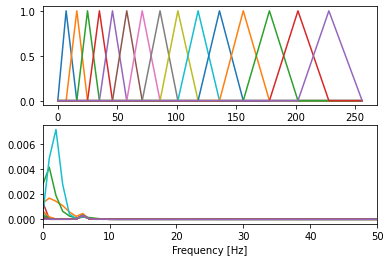

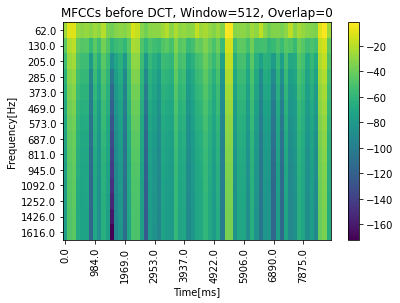

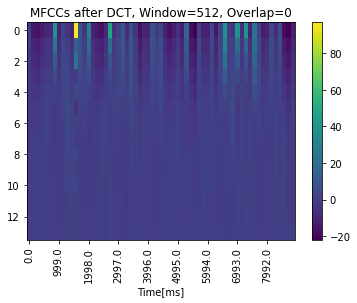

(63, 14)
[   0.           62.46156827  130.49663297  204.60252174  285.32093912
  373.24192641  469.00817477  573.31972321  686.93907581  810.69677547
  945.49747514 1092.32655068 1252.25730382 1426.4588079  1616.2044536
 1822.88125731 2048.        ]


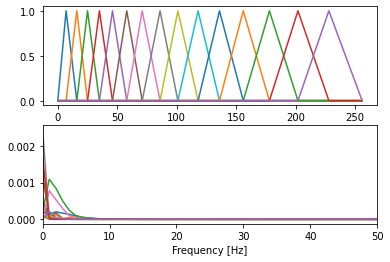

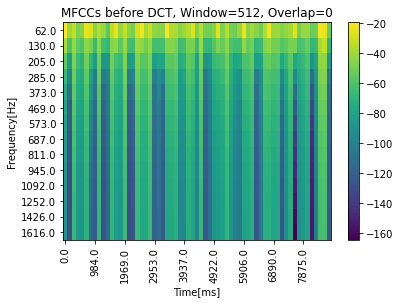

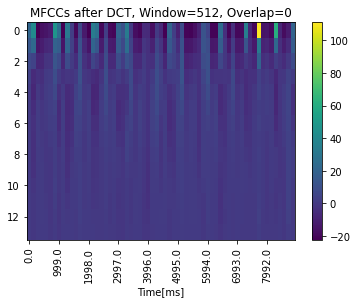

(63, 14)


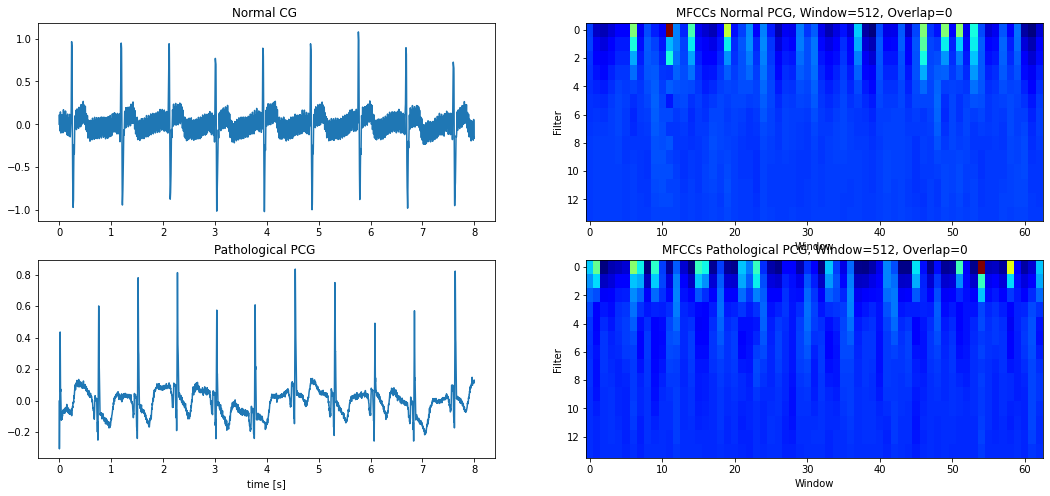

In [3]:
def freq2scale(MotherWavelet,Fs,fmax,fmin):
    cf=pw.central_frequency(MotherWavelet)
    Scale=[]
    freqs=[fmax,fmin]
    for fr in freqs:
        Scale.append(np.round(np.log((cf*Fs)/fr))/np.log(2))
    return Scale

path ='./Signals'
Dir=np.sort(os.listdir(path))[3:]
first = np.array([file[0] for file in Dir])
last = np.array([file[-5] for file in Dir])
NormalECG=Dir[(first=='n') & (last=='E')]
PatologicalECG=Dir[(first=='r') & (last=='E')]
NormalPCG=Dir[(first=='n') & (last=='P')]
PatologicalPCG=Dir[(first=='r') & (last=='P')]
NECG= pd.read_csv(path+'/'+NormalECG[0])
NECG=np.array(NECG).reshape(NECG.shape[0],)
NPCG= pd.read_csv(path+'/'+NormalPCG[0])
NPCG=np.array(NPCG).reshape(NECG.shape[0],)
PECG= pd.read_csv(path+'/'+PatologicalECG[0])
PECG=np.array(PECG).reshape(NECG.shape[0],)
PPCG= pd.read_csv(path+'/'+PatologicalPCG[0])
PPCG=np.array(PPCG).reshape(NECG.shape[0],)
def MFCCs (signal,fs,emphasize,frame_length,frame_step,hamming,nfilt,NFFT,num_ceps,sig_lift):
    
    #Sinusoidal Liftering, Ref: https://maxwell.ict.griffith.edu.au/spl/publications/papers/euro99_kkp_fbe.pdf, 
    #                           https://web.ece.ucsb.edu/Faculty/Rabiner/ece259/Reprints/260_bandpass%20liftering.pdf
    
    '''Signal pre-emphasis (optional). It is recommended for voice processing'''
    sample_rate=fs
    #Signal emphasis
    if emphasize==True:
        pre_emphasis = 0.97
        emphasized_signal = np.append(signal[0], signal[1:] - pre_emphasis * signal[:-1])
    else:
        emphasized_signal = signal

    
    '''Signal segmentation (optional hamming window) and stft per segment'''
    signal_length = len(emphasized_signal)
    frame_length = int(round(frame_length))
    frame_step = int(round(frame_step))
    num_frames = int(np.ceil(float(np.abs(signal_length - frame_length)) / frame_step))  # Make sure that we have at least 1 frame
    pad_signal_length = num_frames * frame_step + frame_length
    z = np.zeros((pad_signal_length - signal_length))
    pad_signal = np.append(emphasized_signal, z) # Pad Signal to make sure that all frames have equal number of samples without truncating any samples from the original signal
    indices = np.tile(np.arange(0, frame_length), (num_frames, 1)) + np.tile(np.arange(0, num_frames * frame_step, frame_step), (frame_length, 1)).T
    frames = pad_signal[indices.astype(np.int32, copy=False)]
    if hamming == True:
        frames *= np.hamming(frame_length)
    mag_frames = np.absolute(np.fft.rfft(frames, NFFT))  # Magnitude of the FFT
    pow_frames = ((1.0 / NFFT) * ((mag_frames) ** 2))  # Power Spectrum
    
    ''' Generation of filter banks: Triangular filters are calculated in the space of
    mel frequencies and then converted to Hz. The number of filters is specified by the user
    Filters graphs are provided. The variable fbank stores the central frequencies  '''
    low_freq_mel = 0
    high_freq_mel = (2595 * np.log10(1 + (sample_rate / 2) / 700))  # Convert Hz to Mel
    mel_points = np.linspace(low_freq_mel, high_freq_mel, nfilt + 2)  # Equally spaced in Mel scale
    hz_points = (700 * (10**(mel_points / 2595) - 1))  # Convert Mel to Hz
    print(hz_points)
    bin = np.floor((NFFT + 1) * hz_points / sample_rate)
    fbank = np.zeros((nfilt, int(np.floor(NFFT / 2 + 1))))
    for m in range(1, nfilt + 1):
        f_m_minus = int(bin[m - 1])   # left
        f_m = int(bin[m])             # center
        f_m_plus = int(bin[m + 1])    # right
    
        for k in range(f_m_minus, f_m):
            fbank[m - 1, k] = (k - bin[m - 1]) / (bin[m] - bin[m - 1])
        for k in range(f_m, f_m_plus):
            fbank[m - 1, k] = (bin[m + 1] - k) / (bin[m + 1] - bin[m])
    
    fig, axs = plt.subplots(2)
    for filt,power in zip(fbank,pow_frames):
        axs[0].plot(filt)
        axs[0].set_xlabel('Frequency [Hz]')
        axs[1].plot(power/fs)
        axs[1].set_xlabel('Frequency [Hz]')
        axs[1].set_xlim(0,50)
    
    
    ''' Filter bank * spectral power of each window'''
    filter_banks = np.dot(pow_frames, fbank.T)
    filter_banks = np.where(filter_banks == 0, np.finfo(float).eps, filter_banks)  # Numerical Stability
    filter_banks = 20 * np.log10(filter_banks)  # dB
    
    
    ''' MFCCs = dct (Filterbanks) <- discrete cosine transform '''
    if num_ceps=='all':
        mfcc = dct(filter_banks, type=2, axis=1, norm='ortho')[:, 1 : (nfilt + 1)] # Keep 2-13
    else: 
        mfcc = dct(filter_banks, type=2, axis=1, norm='ortho')[:, 1: (num_ceps + 1)] # Keep 2-13
        filter_banks= filter_banks[:, 1 : (num_ceps + 1)]
    
    
    
    (nframes, ncoeff) = mfcc.shape
    cep_lifter = 22
    n = np.arange(ncoeff)
    if sig_lift=='True':
        lift = 1 + (cep_lifter / 2) * np.sin(np.pi * n / cep_lifter)
        mfcc *= lift  #*
        
    #Normalization MFCCs - mean(MFCCs)
    # filter_banks -= (np.mean(filter_banks, axis=0) + 1e-8)
    mfcc -= (np.mean(mfcc, axis=0) + 1e-8)
    #librosa.display.specshow(mfcc.T, sr=fs, hop_length=frame_step, x_axis='time', y_axis='linear')
    plt.figure()
    plt.imshow(filter_banks.T, aspect='auto')
    plt.yticks(np.arange(0, (filter_banks.T).shape[0],
    int(np.ceil(filter_banks.T).shape[0] / (filter_banks.T).shape[0])),map(str,np.round(hz_points[1:(filter_banks.T).shape[0]+1].T)))
    plt.xticks(np.arange(0, (filter_banks.T).shape[1],
    int(np.ceil(filter_banks.T).shape[1] / 8)),map(str,np.round(np.linspace(0,(len(signal)-512)/fs,9)*1000)),rotation='vertical')
    plt.xlabel('Time[ms]')
    plt.ylabel('Frequency[Hz]')
    plt.title('MFCCs before DCT, Window=' +str(frame_length)+ ', Overlap=' +str(frame_length-frame_step))
    plt.colorbar()
    plt.show()
    
    plt.figure()
    plt.imshow(mfcc.T, aspect='auto')
    plt.xticks(np.arange(0, (mfcc.T).shape[1],
    int(np.ceil(mfcc.T).shape[1] / 8)),map(str,np.round(np.linspace(0,(len(signal)-30)/fs,9)*1000)),rotation='vertical')
    plt.xlabel('Time[ms]')
    plt.title('MFCCs after DCT, Window=' +str(frame_length)+ ', Overlap=' +str(frame_length-frame_step))
    plt.colorbar()
    plt.show()
    print(mfcc.shape)
    
    return mfcc

Fs=4096
Dp=Fs*2
t=np.arange(0,len(NECG)/Fs,1/Fs)
signal=NPCG
emphasize=False
sig_lift=False    
hamming=False
frame_length=512
frame_step=512
nfilt = 15 # number of filters
NFFT = 512
# num_ceps='all'
num_ceps=15
mfcc1=MFCCs(NECG,Fs,emphasize,frame_length,frame_step,hamming,nfilt,NFFT,num_ceps,sig_lift)
mfcc2=MFCCs(PECG,Fs,emphasize,frame_length,frame_step,hamming,nfilt,NFFT,num_ceps,sig_lift)
fig, axs = plt.subplots(2,2, figsize=(18,8))
axs[0,0].plot(t,NECG)
axs[0,0].set_title('Normal CG ')
axs[1,0].plot(t,PECG)
axs[1,0].set_title('Pathological PCG ')
axs[1,0].set_xlabel('time [s]')

axs[0,1].imshow(mfcc1.T, aspect='auto',cmap='jet')
axs[0,1].set_xlabel('Time[ms]')
axs[0,1].set_title('MFCCs Normal PCG, Window=' +str(frame_length)+ ', Overlap=' +str(frame_length-frame_step))
axs[0,1].set_xlabel('Window')
axs[0,1].set_ylabel('Filter')
axs[1,1].imshow(mfcc2.T, aspect='auto',cmap='jet')
axs[1,1].set_xlabel('Time[ms]')
axs[1,1].set_title('MFCCs Pathological PCG, Window=' +str(frame_length)+ ', Overlap=' +str(frame_length-frame_step))
axs[1,1].set_xlabel('Window')
axs[1,1].set_ylabel('Filter')
plt.show()
    

Speak now!...
Ending recording...
[    0.            62.03206123   129.56123192   203.07465067
   283.102625     370.22245675   465.0626067    568.30722807
   680.70110182   803.05500937   936.25158133  1081.25166459
  1239.10125362  1410.93903604  1598.00460681  1801.64741034
  2023.3364751   2264.67101077  2527.39194458  2813.39447989
  3124.74176774  3463.67978992  3832.65356087  4234.32476547
  4671.59095972  5147.60647302  5665.8051627   6229.92518502
  6844.03596129  7512.56753367  8240.34252238  9032.61091489
  9895.08793802 10833.99528616 11856.10600303 12968.79334071
 14180.08394848 15498.71577503 16934.20110187 18496.89516255
 20198.07084273 22050.        ]


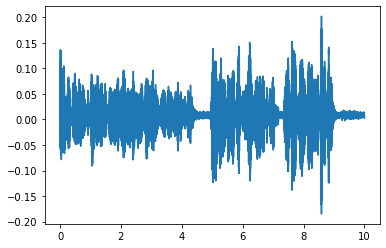

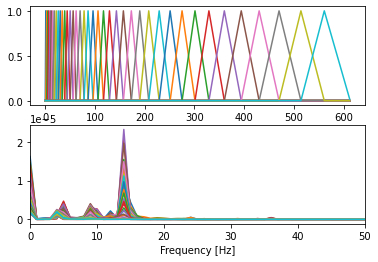

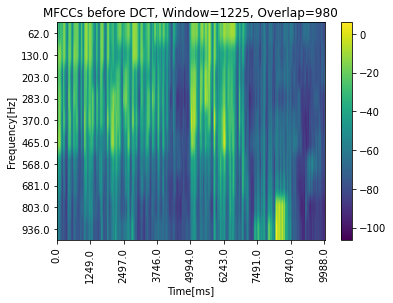

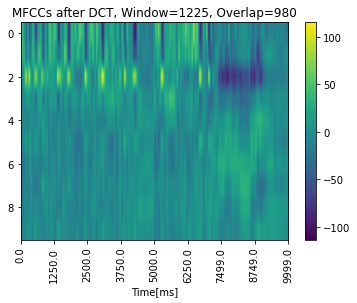

(1795, 10)


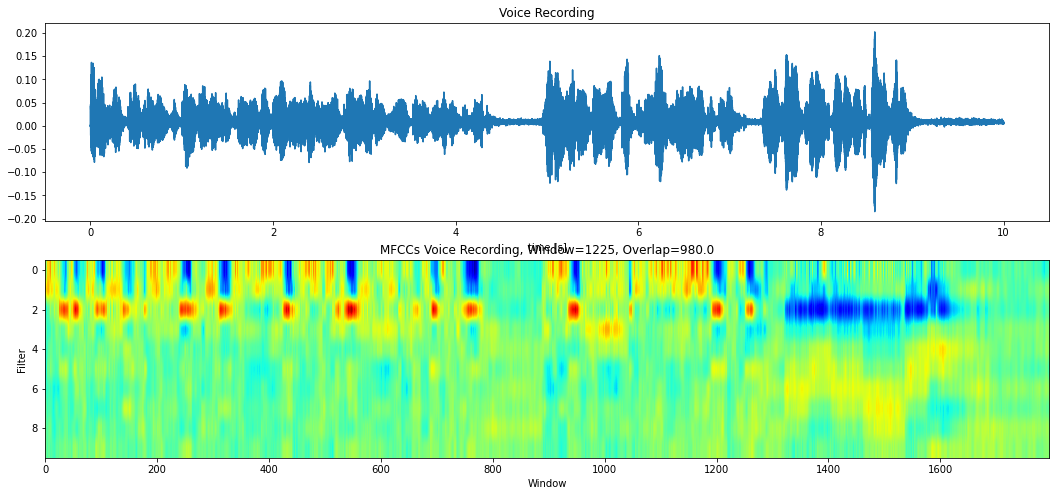

In [8]:
# If error while importing sounddivice: run sudo apt-get install libportaudio2


import sounddevice as sd
from scipy.io.wavfile import write
import wavio as wv

# Sampling frequency
Fs = 44100

# Recording duration
duration = 10

# Start recorder with the given values 
# of duration and sample frequency
print('Speak now!...')
recording = sd.rec(int(duration * Fs), 
                   samplerate=Fs, channels=1)

  
# Record audio for the given number of seconds
sd.wait()
print('Ending recording...')
t=np.arange(0,len(recording)/Fs,1/Fs)
plt.plot(t,recording)
signal=recording
emphasize=False
sig_lift=False    
hamming=False
frame_length=1225 #change window size
frame_step=1225 # change overlaping
nfilt = 40 # number of filters
NFFT = frame_length # Datatpoints of each segments for FFT
num_ceps='all'
#num_ceps=10
mfcc1=MFCCs(signal,Fs,emphasize,frame_length,frame_step,hamming,nfilt,NFFT,num_ceps,sig_lift)
# mfcc2=MFCCs(PPCG,Fs,emphasize,frame_length,frame_step,hamming,nfilt,NFFT,num_ceps,sig_lift)
fig, axs = plt.subplots(2, figsize=(18,8))
axs[0].plot(t,signal)
axs[0].set_title('Voice Recording')
# axs[1,0].plot(t,PPCG)
# axs[1,0].set_title('Pathological PCG ')
axs[0].set_xlabel('time [s]')

axs[1].imshow(mfcc1.T, aspect='auto',cmap='jet')
axs[1].set_xlabel('Time[ms]')
axs[1].set_title('MFCCs Voice Recording, Window=' +str(frame_length)+ ', Overlap=' +str(frame_length-frame_step))
axs[1].set_xlabel('Window')
axs[1].set_ylabel('Filter')
# axs[1,1].imshow(mfcc2.T, aspect='auto')
# axs[1,1].set_xlabel('Time[ms]')
# axs[1,1].set_title('MFCCs Pathological PCG, Window=' +str(frame_length)+ ', Overlap=' +str(frame_length-frame_step))
# axs[1,1].set_xlabel('Window')
# axs[1,1].set_ylabel('Filter')
plt.show()